In [83]:
import tensorflow as tf


In [84]:
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

from keras.models import load_model

from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

from keras.datasets import mnist
import numpy as np 
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import cv2
from glob import glob
import os

preprocessing

In [85]:
def load_data(p):
    pattern = os.path.join(p,'*.jpg')
    files = glob(pattern)
    images = []
    targets = []
    for file in files :
        im = cv2.imread(file)
        im =(255-cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))/255.0
        images.append(im)
        chars = (list(os.path.splitext(os.path.basename(file))[0]))
        if len(chars) !=5 :
            continue
        targets.append(chars)
    images = np.array(images , ndmin=3) 
    targets = np.array (targets,ndmin=2)
    return images , targets

In [101]:
x_train, y_train = load_data("E:\\AI.anisa.python\\archive(2)\\train-1")
x_test, y_test = load_data("E:\\AI.anisa.python\\archive(2)\\test-2")

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

print(x_train.shape , y_train.shape)
print( x_test.shape , y_test.shape)

(8274, 40, 150, 1) (8274, 5)
(356, 40, 150, 1) (356, 5)


In [102]:
encoder = LabelEncoder()
encoder.fit (y_train.reshape(-1))
with open( ' encoder.bin' , 'wb') as f :
    pickle.dump(encoder , f)

In [103]:
print(x_train.shape,x_test.shape)
print(yt.shape ,yt_test.shape)

(8274, 40, 150, 1) (356, 40, 150, 1)
(8274, 39) (1293, 39)


In [157]:
num_classes = len(np.unique(y_train_encoded))
num_classes

60

In [106]:
y_train_encoded = encoder.transform(y_train.reshape(-1)).reshape(-1,5)
y_test_encoded = encoder.transform(y_test.reshape(-1)).reshape(-1,5)
print(y_train_encoded.shape)

(8274, 5)


In [107]:
yt = to_categorical(y_train_encoded[:, 0], num_classes=39)
yt_test = to_categorical(y_test_encoded[:, 0], num_classes=39)


In [117]:
model = Sequential()
model.add(Input(shape=(40,150,1)))
# feature learning
model.add(Conv2D(4, (3,3), padding='same', activation='relu'))
model.add(Conv2D(8, (3,3), padding='same', activation='relu'))
model.add(Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
#classification
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(39, activation='softmax'))


model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 40, 150, 4)          │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 40, 150, 8)          │             296 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 40, 150, 16)         │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 20, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 24000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       3,072,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 39)                  │           2,535 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,084,423 (11.77 MB)

 Trainable params: 3,084,423 (11.77 MB)

 Non-trainable params: 0 (0.00 B)

In [110]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [112]:
 h = model.fit( x_train , yt , validation_data=(x_test , yt_test) ,  epochs= 10 )

Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.3146 - loss: 1.6788 - val_accuracy: 0.2022 - val_loss: 1.7691
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6496 - loss: 0.9284 - val_accuracy: 0.6433 - val_loss: 0.8957
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.7531 - loss: 0.6603 - val_accuracy: 0.8006 - val_loss: 0.5614
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8111 - loss: 0.5093 - val_accuracy: 0.7444 - val_loss: 0.5997
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8553 - loss: 0.3892 - val_accuracy: 0.9073 - val_loss: 0.2862
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9027 - loss: 0.2665 - val_accuracy: 0.9607 - val_loss: 0.1509
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9317 - loss: 0.1872 - val_accuracy: 0.9607 - val_loss: 0.1336
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9520 - loss: 0.1381 - val_acc

Text(0.5, 0, 'epoch')

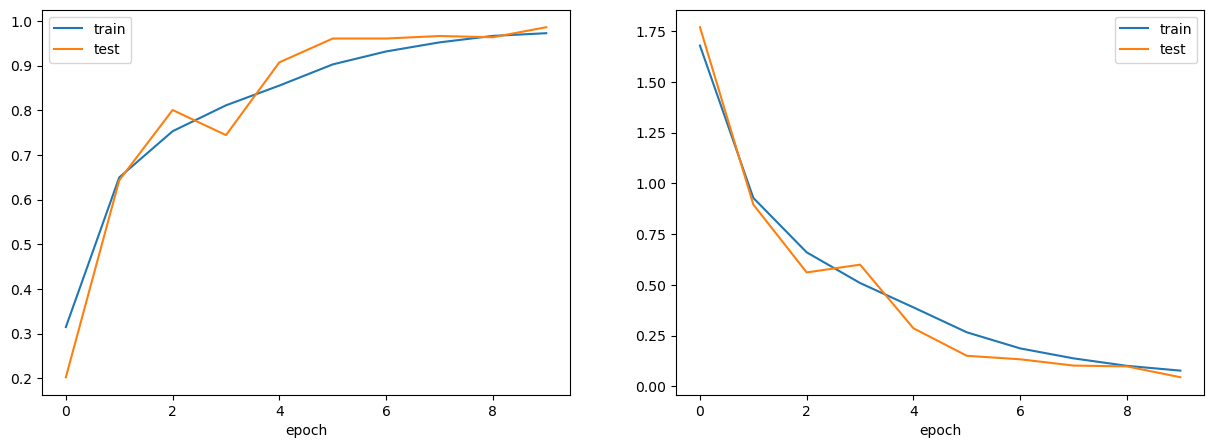

In [113]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['train' , 'test' ] )
plt.xlabel('epoch')

plt.subplot(1,2,2)
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['train' , 'test' ] )
plt.xlabel('epoch')

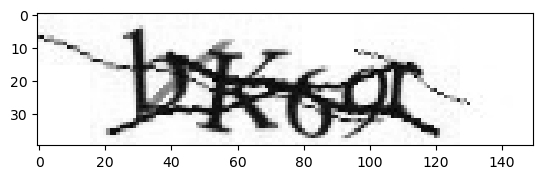

In [149]:
f = "E:\\AI.anisa.python\\archive(2)\\test-2\\bK69r.jpg"
im = cv2.imread(f)
im = cv2.cvtColor( im , cv2.COLOR_BGR2GRAY)
im = (255-im)/255.0
plt.imshow(im , 'gray')

In [150]:
r= model.predict(im.reshape(1,40,150,1))
r

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[0.02276018, 0.03268696, 0.02678419, 0.0251114 , 0.02106545,
        0.02088734, 0.02761681, 0.03049993, 0.0196224 , 0.02897513,
        0.02147124, 0.01971521, 0.02779099, 0.0279058 , 0.02556613,
        0.02571309, 0.02983041, 0.02957655, 0.03060104, 0.02579512,
        0.02522854, 0.02826332, 0.02862715, 0.02494619, 0.0225394 ,
        0.03276255, 0.01818824, 0.02705108, 0.02110782, 0.02585718,
        0.02649263, 0.02833882, 0.02540177, 0.02071317, 0.02117614,
        0.02534483, 0.02909503, 0.02329328, 0.02559751]], dtype=float32)

In [151]:
np.argmax(r)

25

In [153]:
encoder.inverse_transform([np.argmax(r)])

array(['Q'], dtype='<U1')

In [49]:
im = cv2.imread("E:\\AI.anisa.python\\archive(2)\\pic\\1DxHB.jpg")


In [29]:
im =(255-cv2.cvtColor(im, cv2.COLOR_BGR2GRAY))/255.0

In [154]:
model.save('model.h5')